# Ракета

Сначала разберемся, как ведет себя ракета с переменной массой. Для этого запишем изменение массы и скорости за время $ dt $ и импульс газа и ракеты (пренебрежем действием силы тяжесты, хотя это и не очень хорошо)

$$ P_g = dm(u - u_g) $$

$$ P_r = (m - dm) * (u + du) $$

По закону сохранению энергии $ P = const $ , поэтому

$$ P = P_g + P_r = mu = (m - dm) * (u + du) + dm(u - u_g) $$

Раскроем скобки и приведем к виду:

$$ du = \frac{dm * u_g}{m - dm} $$ 

Вот мы довольно быстро и нашли нужную нам формулу, которой сейчас и воспользуемся.

Также расипишим проекции на оси:

$$ sin(a) = \frac{u_y}{u}; cos(a) = \frac{u_x}{u}; u = \sqrt{u_x^2 + u_y^2}$$

$$ du_x = sin(a) * \frac{dm * u_g}{m - dm} = \frac{u_y}{u} * \frac{dm * u_g}{m - dm} $$

$$ du_y = cos(a) * \frac{dm * u_g}{m - dm} = \frac{u_x}{u} * \frac{dm * u_g}{m - dm} $$

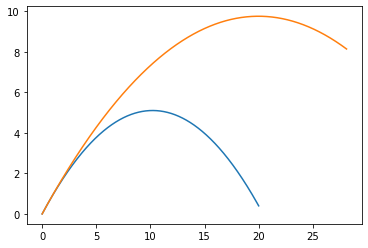

In [16]:
import matplotlib.pyplot as pp
import numpy as np

MODEL_G = 9.81
MODEL_DT = 0.001
MODEL_DM = 0.1     #Изменение массы ракеты (кол-во вылетающего газа за ед. времени)
MODEL_U = 20       #Скорость вылетающего газа относительно Земли (!)

class Body:
    def __init__(self, x, y, vx, vy):

        self.x = x
        self.y = y
        self.vx = vx
        self.vy = vy

        self.trajectory_x = []
        self.trajectory_y = []

    def advance(self):

        self.trajectory_x.append(self.x)
        self.trajectory_y.append(self.y)

        self.x += self.vx * MODEL_DT
        self.y += self.vy * MODEL_DT
        self.vy -= MODEL_G * MODEL_DT

class Rocket(Body):
    def __init__(self, x, y):
        super().__init__(x, y, 10, 10)
        self.m = 40               #Масса всей ракеты (т.е. вместе с топливом)

    def advance(self):
        super().advance()
        if self.m >= 30:          #Таким условием мы обозначаем массу корпуса ракеты
            self.m -= MODEL_DM
            v = (self.vx ** 2 + self.vy ** 2) ** 0.5
            
            dv = MODEL_U * MODEL_DM / self.m        #Изменение всей скрости за dt (не считая силу тяжести)
            v = (self.vx ** 2 + self.vy ** 2)**0.5  
            self.vx += dv * self.vx / v             #Изменение проеции скорости
            self.vy += dv * self.vy / v

b = Body(0, 0, 10, 10)
r = Rocket(0, 0)

bodies = [b, r]

for t in np.r_[0:2:MODEL_DT]:
    for b in bodies:
        b.advance()

for b in bodies:
     pp.plot(b.trajectory_x, b.trajectory_y) 
pp.show()